<a href="https://colab.research.google.com/github/rvt9bx/DS4002-Project3/blob/main/SCRIPTS/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!pip install rarfile

In [9]:
import rarfile

rar_path = "/content/drive/My Drive/fire_data.rar"
extract_path = "/content/extracted_fire_data"

rf = rarfile.RarFile(rar_path)
rf.extractall(extract_path)

In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

In [14]:
# List contents of the extracted data folder
print(os.listdir("/content/extracted_fire_data"))

['Dataset']


In [21]:
train_path = "/content/extracted_fire_data/Dataset/Training and Validation"
test_path = "/content/extracted_fire_data/Dataset/Testing"

# Check categories inside Training and Validation
categories = os.listdir(train_path)
print("Categories in Training and Validation:", categories)

# Count images in each category (fire vs no fire)
for category in categories:
    category_path = os.path.join(train_path, category)
    print(f"{category}: {len(os.listdir(category_path))} images")

#do the same for the test group -- this ensures we have extracted the dataset correctly
# 1900 images in total, where 950 images belong to each class divided 80/20 training/testing
test_categories = os.listdir(test_path)
print("\nCategories in Testing:", test_categories)

for category in test_categories:
    category_path = os.path.join(test_path, category)
    print(f"{category}: {len(os.listdir(category_path))} images")

Categories in Training and Validation: ['nofire', 'fire']
nofire: 760 images
fire: 760 images

Categories in Testing: ['nofire', 'fire']
nofire: 190 images
fire: 190 images


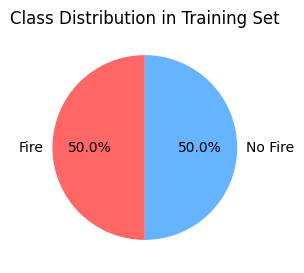

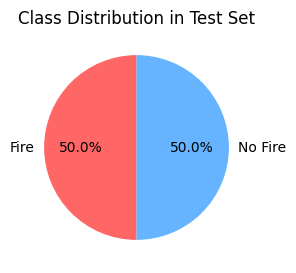

In [43]:
# Get the count of fire vs no-fire images in training set
fire_count = len(os.listdir(os.path.join(train_path, 'fire')))
nofire_count = len(os.listdir(os.path.join(train_path, 'nofire')))

labels = ['Fire', 'No Fire']
sizes = [fire_count, nofire_count]
colors = ['#ff6666', '#66b3ff']

# Get the count of fire vs no-fire images in test set
fire_count_test = len(os.listdir(os.path.join(test_path, 'fire')))
nofire_count_test = len(os.listdir(os.path.join(test_path, 'nofire')))

labels2 = ['Fire', 'No Fire']
sizes2 = [fire_count_test, nofire_count_test]
colors2 = ['#ff6666', '#66b3ff']

# Plot pie charts
plt.figure(figsize=(3,3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Class Distribution in Training Set")
plt.show()

plt.figure(figsize=(3,3))
plt.pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=90)
plt.title("Class Distribution in Test Set")
plt.show()

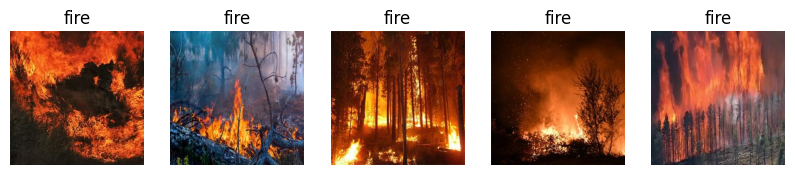

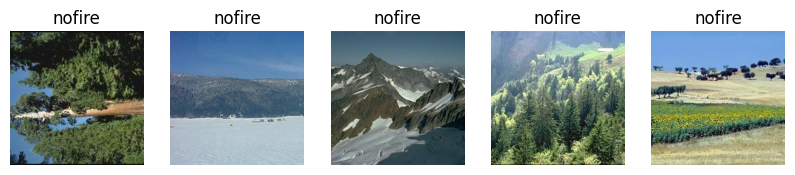

In [28]:
import random
def plot_sample_images(folder_path, category, num_images=5):
    img_dir = os.path.join(folder_path, category)
    images = random.sample(os.listdir(img_dir), num_images)

    plt.figure(figsize=(10, 10))
    for i, img_name in enumerate(images):
        img_path = os.path.join(img_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)
    plt.show()

# Show images from training set
plot_sample_images(train_path, "fire")
plot_sample_images(train_path, "nofire")

In [44]:
#create aggregate fire/nofire image sets before performing EDA so the info is not skewed by only looking at the training/testing sets
import shutil

# Define path
combined_path = "/content/combined_dataset"

# Create new directories for aggregated dataset
os.makedirs(os.path.join(combined_path, "fire"), exist_ok=True)
os.makedirs(os.path.join(combined_path, "nofire"), exist_ok=True)

# Function to copy images
def copy_images(src_folder, dest_folder):
    for img_name in os.listdir(src_folder):
        src_path = os.path.join(src_folder, img_name)
        dest_path = os.path.join(dest_folder, img_name)
        shutil.copy2(src_path, dest_path)

# Copy all fire images
copy_images(os.path.join(train_path, "fire"), os.path.join(combined_path, "fire"))
copy_images(os.path.join(test_path, "fire"), os.path.join(combined_path, "fire"))

# Copy all no-fire images
copy_images(os.path.join(train_path, "nofire"), os.path.join(combined_path, "nofire"))
copy_images(os.path.join(test_path, "nofire"), os.path.join(combined_path, "nofire"))

# Check total images in each category
print("Total Fire Images:", len(os.listdir(os.path.join(combined_path, "fire"))))
print("Total No-Fire Images:", len(os.listdir(os.path.join(combined_path, "nofire"))))

Total Fire Images: 950
Total No-Fire Images: 950


In [45]:
# check image sizing to ensure the size is standardized across the dataset
image_shapes = []

for category in ['fire', 'nofire']:
    folder_path = os.path.join(train_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            image_shapes.append(img.shape[:2])  # (height, width)

# Find unique image sizes
unique_shapes = np.unique(image_shapes, axis=0)
print("Unique image sizes:", unique_shapes)

Unique image sizes: [[250 250]]


Fire Image and Color Histogram:


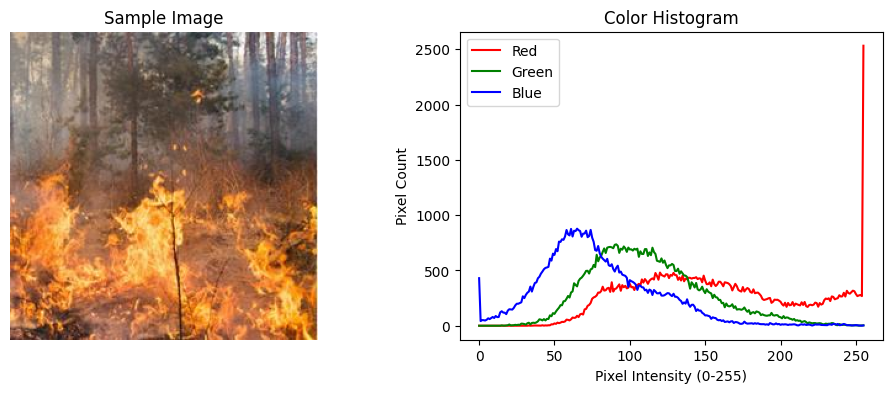

No-Fire Image and Color Histogram:


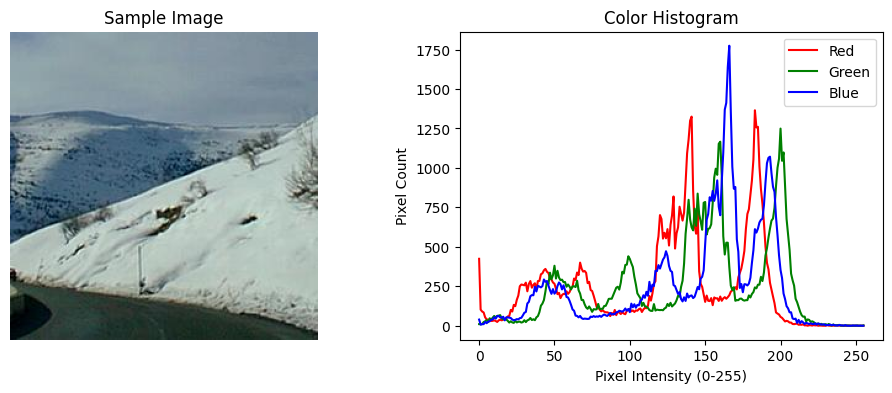

In [50]:
# color distribution analysis between the fire and nofire conditions

def plot_image_with_histogram(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Create subplots: 1st for image, 2nd for histogram
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # Show the image
    ax[0].imshow(img_rgb)
    ax[0].axis("off")  # Hide axis
    ax[0].set_title("Sample Image")

    # Plot color histogram with labels
    colors = ('r', 'g', 'b')
    labels = ('Red', 'Green', 'Blue')

    for i, (color, label) in enumerate(zip(colors, labels)):
        hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
        ax[1].plot(hist, color=color, label=label)

    ax[1].set_title("Color Histogram")
    ax[1].set_xlabel("Pixel Intensity (0-255)")  # X-axis: brightness of color
    ax[1].set_ylabel("Pixel Count")  # Y-axis: number of pixels at each intensity
    ax[1].legend()  # Show color labels

    plt.show()

# Select random fire and no-fire images
sample_fire = os.path.join(combined_path, "fire", random.choice(os.listdir(os.path.join(combined_path, "fire"))))
sample_nofire = os.path.join(combined_path, "nofire", random.choice(os.listdir(os.path.join(combined_path, "nofire"))))

print("Fire Image and Color Histogram:")
plot_image_with_histogram(sample_fire)

print("No-Fire Image and Color Histogram:")
plot_image_with_histogram(sample_nofire)

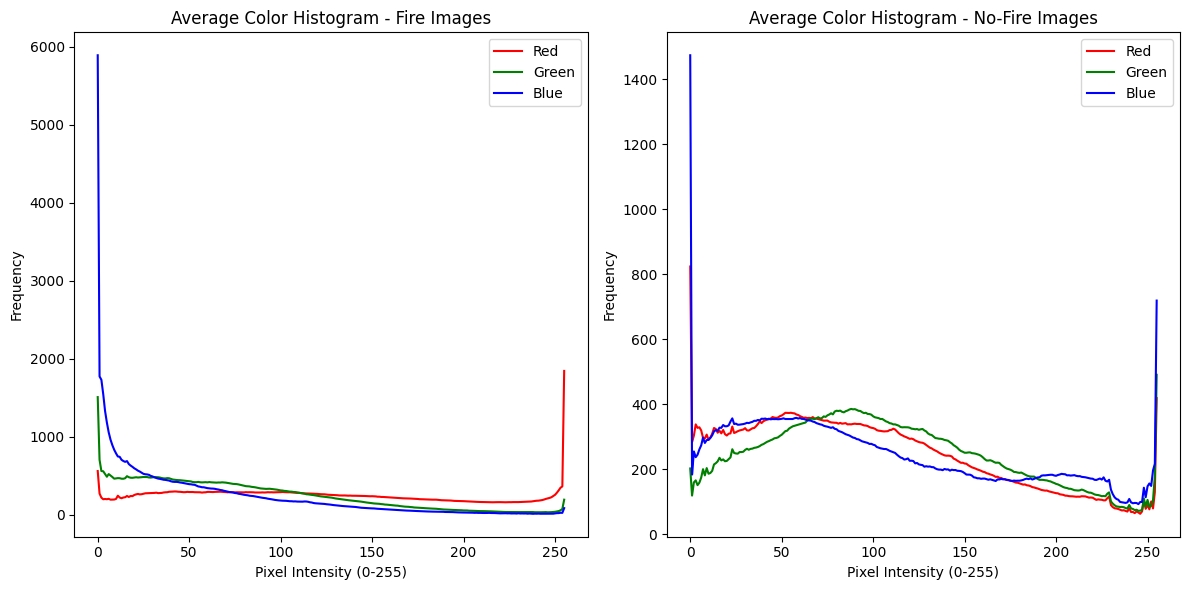

In [52]:
def compute_average_histogram(folder_path):
    # Initialize arrays to accumulate histograms for R, G, and B channels
    r_hist = np.zeros(256)
    g_hist = np.zeros(256)
    b_hist = np.zeros(256)

    # Loop through all images in the folder
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            # Convert to RGB (OpenCV loads in BGR by default)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Calculate histograms for R, G, and B channels
            r_hist += cv2.calcHist([img_rgb], [0], None, [256], [0, 256]).flatten()
            g_hist += cv2.calcHist([img_rgb], [1], None, [256], [0, 256]).flatten()
            b_hist += cv2.calcHist([img_rgb], [2], None, [256], [0, 256]).flatten()

    # Normalize by number of images
    num_images = len(os.listdir(folder_path))
    r_hist /= num_images
    g_hist /= num_images
    b_hist /= num_images

    return r_hist, g_hist, b_hist

# Paths to fire and no-fire categories in the combined set
fire_path = os.path.join(combined_path, 'fire')
nofire_path = os.path.join(combined_path, 'nofire')

# Compute average histograms for both fire and no-fire categories
r_fire, g_fire, b_fire = compute_average_histogram(fire_path)
r_nofire, g_nofire, b_nofire = compute_average_histogram(nofire_path)

# Plot the histograms
plt.figure(figsize=(12, 6))

# Plot fire histogram
plt.subplot(1, 2, 1)
plt.plot(r_fire, color='red', label='Red')
plt.plot(g_fire, color='green', label='Green')
plt.plot(b_fire, color='blue', label='Blue')
plt.title('Average Color Histogram - Fire Images')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.legend()

# Plot no-fire histogram
plt.subplot(1, 2, 2)
plt.plot(r_nofire, color='red', label='Red')
plt.plot(g_nofire, color='green', label='Green')
plt.plot(b_nofire, color='blue', label='Blue')
plt.title('Average Color Histogram - No-Fire Images')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

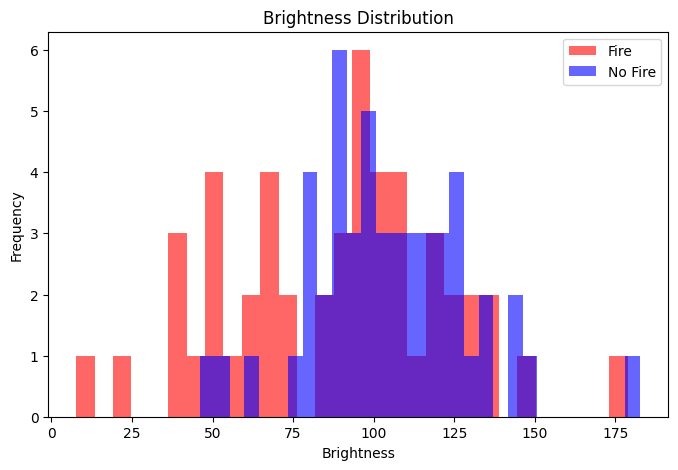

In [53]:
#Checking the brightness of the fire images vs the nofire images

def compute_brightness(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return np.mean(img)

fire_brightness = [compute_brightness(os.path.join(combined_path, "fire", img)) for img in random.sample(os.listdir(os.path.join(train_path, "fire")), 50)]
nofire_brightness = [compute_brightness(os.path.join(combined_path, "nofire", img)) for img in random.sample(os.listdir(os.path.join(train_path, "nofire")), 50)]

plt.figure(figsize=(8,5))
plt.hist(fire_brightness, bins=30, alpha=0.6, color='red', label='Fire')
plt.hist(nofire_brightness, bins=30, alpha=0.6, color='blue', label='No Fire')
plt.xlabel("Brightness")
plt.ylabel("Frequency")
plt.legend()
plt.title("Brightness Distribution")
plt.show()

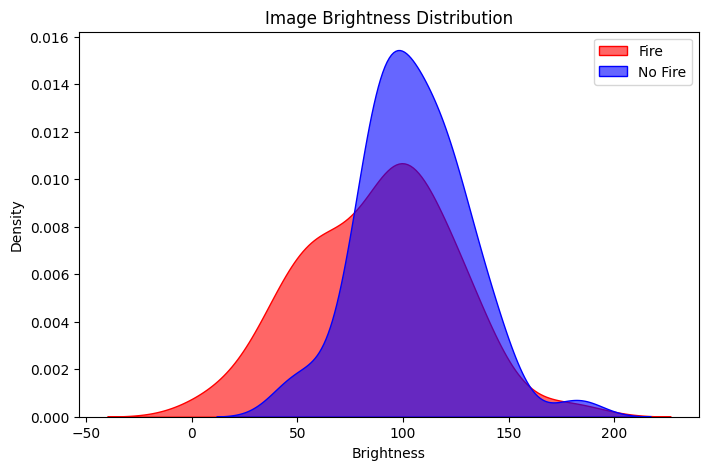

In [54]:
import seaborn as sns

# Plot histograms with KDE trendlines
plt.figure(figsize=(8,5))

# KDE for Fire Images
sns.kdeplot(fire_brightness, color='red', label='Fire', fill=True, alpha=0.6)

# KDE for No-Fire Images
sns.kdeplot(nofire_brightness, color='blue', label='No Fire', fill=True, alpha=0.6)

plt.xlabel("Brightness")
plt.ylabel("Density")
plt.legend()
plt.title("Image Brightness Distribution")
plt.show()

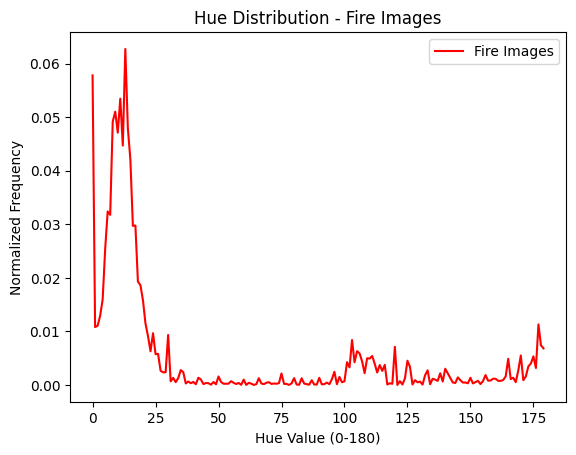

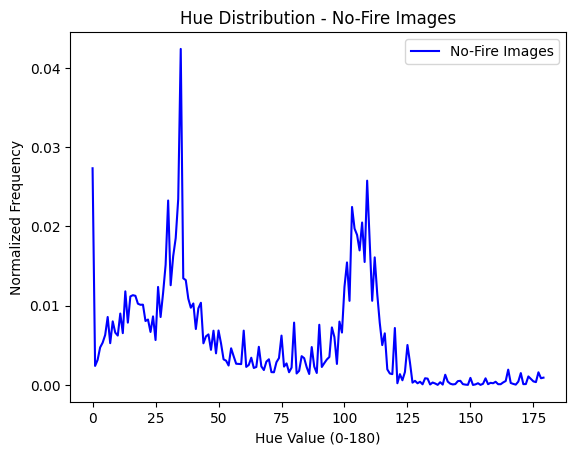

In [55]:
def compute_hue_histogram(image_path):
    img = cv2.imread(image_path)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Extract Hue channel
    hue_channel = img_hsv[:, :, 0]

    # Compute histogram of Hue values
    hist = cv2.calcHist([hue_channel], [0], None, [180], [0, 180])  # 180 bins for hue range
    hist = hist.flatten()

    return hist

def plot_avg_hue_histogram(image_paths, title, color):
    total_hist = np.zeros(180)  # Initialize histogram with 180 bins

    # Compute hue histograms for a sample of images
    for img_path in random.sample(image_paths, min(50, len(image_paths))):  # Sample up to 50 images
        total_hist += compute_hue_histogram(img_path)

    # Normalize histogram
    total_hist /= np.sum(total_hist)

    # Plot hue histogram
    plt.plot(total_hist, color=color, label=title)
    plt.xlabel("Hue Value (0-180)")
    plt.ylabel("Normalized Frequency")
    plt.title(f"Hue Distribution - {title}")
    plt.legend()
    plt.show()

# Get file paths for fire and no-fire images
fire_images = [os.path.join(combined_path, "fire", img) for img in os.listdir(os.path.join(combined_path, "fire"))]
nofire_images = [os.path.join(combined_path, "nofire", img) for img in os.listdir(os.path.join(combined_path, "nofire"))]

# Plot average hue histograms
plot_avg_hue_histogram(fire_images, "Fire Images", "red")
plot_avg_hue_histogram(nofire_images, "No-Fire Images", "blue")

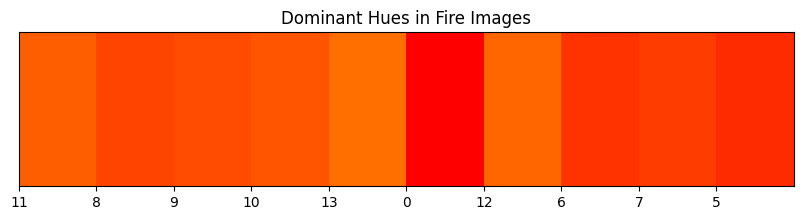

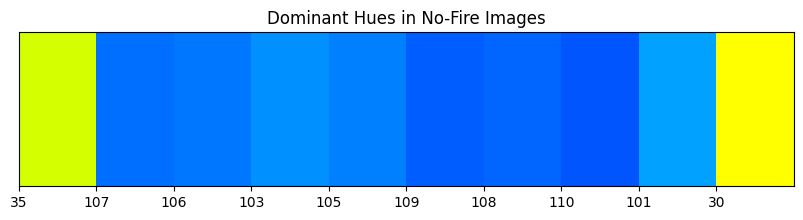

In [65]:
from collections import Counter
def get_dominant_hues(image_paths, num_colors=10):
    hue_counts = Counter()

    # Process ALL images in the dataset
    for img_path in image_paths:
        img = cv2.imread(img_path)
        if img is None:
            continue  # Skip if the image cannot be loaded
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hues = img_hsv[:, :, 0].flatten()
        hue_counts.update(hues)  # Count occurrences of each hue value

    # Get the most common hues
    common_hues = hue_counts.most_common(num_colors)
    return [hue for hue, _ in common_hues]

def plot_hue_bars(hue_list, title):
    # Convert hue values to RGB
    hsv_colors = [(h, 255, 255) for h in hue_list]  # Full saturation and brightness
    rgb_colors = [cv2.cvtColor(np.uint8([[color]]), cv2.COLOR_HSV2RGB)[0][0] / 255 for color in hsv_colors]

    fig, ax = plt.subplots(figsize=(10, 2))
    ax.imshow([rgb_colors], extent=[0, len(hue_list), 0, 1], aspect="auto")
    ax.set_xticks(range(len(hue_list)))
    ax.set_xticklabels(hue_list)
    ax.set_yticks([])
    ax.set_title(title)
    plt.show()

# Get file paths
fire_images = [os.path.join(combined_path, "fire", img) for img in os.listdir(os.path.join(combined_path, "fire"))]
nofire_images = [os.path.join(combined_path, "nofire", img) for img in os.listdir(os.path.join(combined_path, "nofire"))]

# Get dominant hues and plot
fire_hues = get_dominant_hues(fire_images)
nofire_hues = get_dominant_hues(nofire_images)

plot_hue_bars(fire_hues, "Dominant Hues in Fire Images")
plot_hue_bars(nofire_hues, "Dominant Hues in No-Fire Images")

In [68]:
# create zip files of the data so i can upload them to the github
combined_dataset_path = combined_path
subset_dataset_path = "/content/extracted_fire_data"


# Zip the combined dataset
shutil.make_archive("/content/fire_data_combined", 'zip', combined_dataset_path)

# Zip the subsetted dataset (training and validation data)
shutil.make_archive("/content/fire_data_subsetted", 'zip', subset_dataset_path)


'/content/fire_data_subsetted.zip'